In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [21]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [24]:
x = df[['YearsExperience']].values
y = df['Salary'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

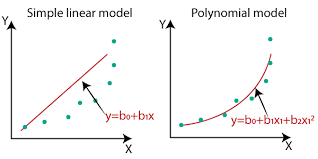

In Polynomial regression, the original features are converted into Polynomial features of required degree (2,3,..,n) and then modeled using a linear model.

Formula : y= b0+b1x1+ b2x1^(2)+ b2x1^(3)+...... bnx1^(n)

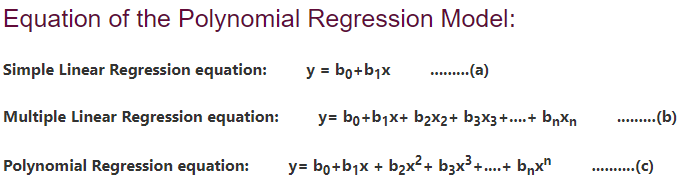

Need for Polynomial Regression:
The need of Polynomial Regression in ML can be understood in the below points:

- If we apply a linear model on a linear dataset, then it provides us a good result as we have seen in Simple Linear Regression, but if we apply the same model without any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased.
- So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. We can understand it in a better way using the below comparison diagram of the linear dataset and non-linear dataset.

In [25]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Create a linear regression model
regressor = LinearRegression()

# Fit the model to the polynomial features
regressor.fit(X_train_poly, y_train)

# Predict the target variable using the model
y_train_pred = regressor.predict(X_train_poly)
y_test_pred = regressor.predict(X_test_poly)

# Calculate and print the metrics
print('Training MSE:', mean_squared_error(y_train, y_train_pred))
print('Test MSE:', mean_squared_error(y_test, y_test_pred))
print('Training R2 Score:', r2_score(y_train, y_train_pred))
print('Test R2 Score:', r2_score(y_test, y_test_pred))

Training MSE: 34405702.84353222
Test MSE: 20471195.736444496
Training R2 Score: 0.9503159349053445
Test R2 Score: 0.9736214494390386


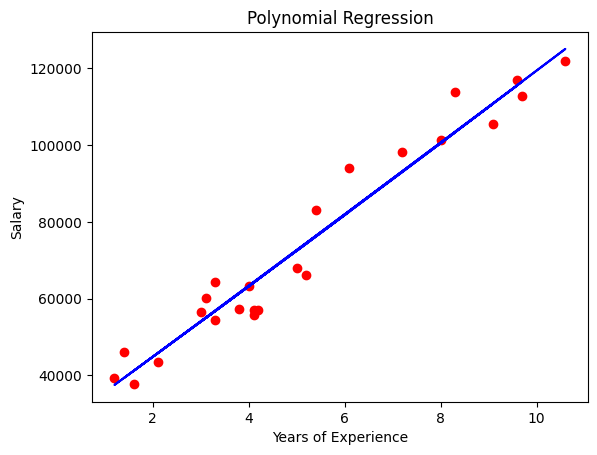

In [26]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,y_train_pred,color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()